In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df=pd.read_csv("topSubscribed.csv")

In [3]:
df.head()

,Rank,Youtube Channel,Subscribers,Video Views,Video Count,Category,Started
0,1,T-Series,"234,000,000","212,900,271,553","18,515",Music,2006
1,2,YouTube Movies,"161,000,000",0,0,Film & Animation,2015
2,3,Cocomelon - Nursery Rhymes,"152,000,000","149,084,178,448",846,Education,2006
3,4,SET India,"150,000,000","137,828,094,104","103,200",Shows,2006
4,5,MrBeast,"128,000,000","21,549,128,785",733,Entertainment,2012


In [4]:
df=df.replace(",","", regex=True)

In [5]:
df[["Subscribers","Video Count"]] = df[["Subscribers","Video Count"]].astype(int)
df["Video Views"] = df["Video Views"].astype(float)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rank             1000 non-null   int64  
 1   Youtube Channel  1000 non-null   object 
 2   Subscribers      1000 non-null   int32  
 3   Video Views      1000 non-null   float64
 4   Video Count      1000 non-null   int32  
 5   Category         1000 non-null   object 
 6   Started          1000 non-null   int64  
dtypes: float64(1), int32(2), int64(2), object(2)
memory usage: 47.0+ KB


In [7]:
df[["Subscribers","Video Views"]] = df[["Subscribers","Video Views"]]/1000000

In [8]:
df.head()

,Rank,Youtube Channel,Subscribers,Video Views,Video Count,Category,Started
0,1,T-Series,234.0,212900.271553,18515,Music,2006
1,2,YouTube Movies,161.0,0.000000,0,Film & Animation,2015
2,3,Cocomelon - Nursery Rhymes,152.0,149084.178448,846,Education,2006
3,4,SET India,150.0,137828.094104,103200,Shows,2006
4,5,MrBeast,128.0,21549.128785,733,Entertainment,2012


In [11]:
df["Video Views"] = df["Video Views"].astype(int)
df["Subscribers"] = df["Subscribers"].astype(int)

In [12]:
df.head()

,Rank,Youtube Channel,Subscribers,Video Views,Video Count,Category,Started
0,1,T-Series,234,212900,18515,Music,2006
1,2,YouTube Movies,161,0,0,Film & Animation,2015
2,3,Cocomelon - Nursery Rhymes,152,149084,846,Education,2006
3,4,SET India,150,137828,103200,Shows,2006
4,5,MrBeast,128,21549,733,Entertainment,2012


C:\Users\MOHMAD\AppData\Local\Temp\ipykernel_30436\1150832963.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr() , annot=True)


<AxesSubplot: >

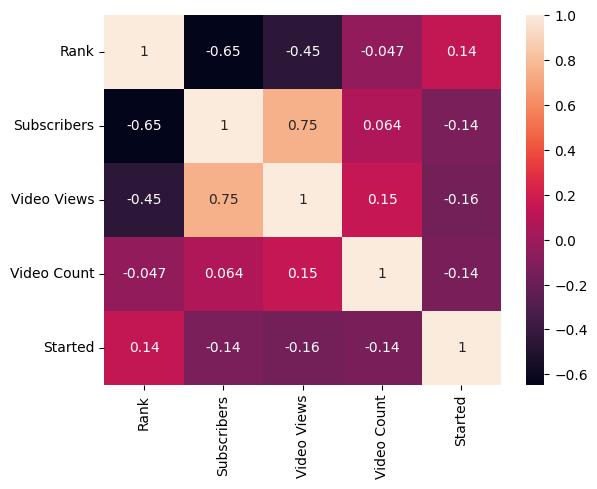

In [15]:
sns.heatmap(df.corr() , annot=True)

In [88]:
x=df.drop(["Subscribers", "Youtube Channel","Category"],axis=1)
y=df[["Subscribers"]]

In [83]:
x.head()

,Rank,Video Views,Started
0,1,212900,2006
1,2,0,2015
2,3,149084,2006
3,4,137828,2006
4,5,21549,2012


In [84]:
y.head()

,Subscribers
0,234
1,161
2,152
3,150
4,128


In [89]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)
len(xtrain)

700

In [90]:
ytrain.head()

,Subscribers
295,21
109,33
271,22
607,14
847,12


In [91]:
from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(xtrain,ytrain)
model.score(xtest,ytest)*100

92.80499176755035

In [81]:
model.predict([[14509,437,5466,2000]])

array([11.291049], dtype=float32)